In [5]:
import TensorFrost as tf
import numpy as np
import matplotlib.pyplot as plt
import time

tf.initialize(tf.opengl)

def matmul():
    A = tf.input([-1, -1], tf.float32)
    N, M = A.shape
    B = tf.input([-1, M, -1], tf.float32)
    K = B.shape[1]

    C = A @ B

    return [C]

mmul = tf.compile(matmul)

matmul:
  Kernel count: 1
  Intermediate buffers: 0
  Host readbacks: 0
  Host writes: 0
  Lines of generated code: 407
  IR Compile time: 0.463100 ms
  Compiler time: 1769.155396 ms



In [4]:
Anp = np.random.rand(32, 64).astype(np.float32)
Bnp = np.random.rand(16, 64, 128).astype(np.float32)

A = tf.tensor(Anp)
B = tf.tensor(Bnp)
C, = mmul(A, B)

Cnp = C.numpy

#compare to numpy
Cnp2 = Anp @ Bnp

print(Cnp)
print(Cnp2)

Cerror = np.linalg.norm(Cnp - Cnp2) / np.linalg.norm(Cnp2)
print("Error:", Cerror)


[[[14.101206  19.289812  18.203432  ... 15.842338  15.466215  15.93557  ]
  [15.350901  19.60301   20.478504  ... 15.299491  16.700644  16.42056  ]
  [14.671233  19.718157  20.496456  ... 16.082712  16.64871   17.163471 ]
  ...
  [14.01392   17.828548  17.433187  ... 15.187289  14.433828  13.774009 ]
  [13.520099  16.904385  17.581436  ... 13.587488  14.298328  13.758576 ]
  [15.643334  20.136871  20.68202   ... 15.529805  16.974615  16.98488  ]]

 [[20.888931  16.983448  16.84017   ... 18.115683  15.303915  16.73172  ]
  [19.292114  14.728485  15.880777  ... 16.332752  14.588774  17.321386 ]
  [21.928364  17.721312  17.259848  ... 18.141996  15.207391  17.857038 ]
  ...
  [19.569954  16.598822  15.986589  ... 16.350096  15.536367  17.327152 ]
  [20.697742  15.460959  17.384054  ... 17.773163  16.931625  17.999702 ]
  [21.74694   17.90795   19.549387  ... 18.694593  15.7602825 19.845827 ]]

 [[18.042242  14.613109  17.197718  ... 15.519835  14.862893  16.345022 ]
  [17.026873  14.71592

In [3]:
S = 256
Anp = np.random.rand(S, S).astype(np.float32)
Bnp = np.random.rand(S, S).astype(np.float32)

A = tf.tensor(Anp)
B = tf.tensor(Bnp)

def TestFunc(f1, max_time):
    t0 = time.time()
    i = 0
    while time.time() - t0 < max_time:
        f1()
        i += 1
    return (time.time() - t0) / i

# Performance test
def TensorFrost():
    C, = mmul(A, B)

def Numpy():
    Cnp2 = Bnp @ Anp

np_time = TestFunc(Numpy, 4)
print("Numpy: ", np_time)

tf_time = TestFunc(TensorFrost, 4)
print("TensorFrost: ", tf_time)

print("TF/NP: ", tf_time / np_time)

Numpy:  0.0009260509776120052
TensorFrost:  1.899527972766302e-05
TF/NP:  0.020512131823072943


In [4]:
# Test performance with different matrix sizes

def test_size(S):
    Anp = np.random.rand(S, S).astype(np.float32)
    Bnp = np.random.rand(S, S).astype(np.float32)

    A = tf.tensor(Anp)
    B = tf.tensor(Bnp)

    # Performance test
    def TensorFrost():
        C, = mmul(A, B)
    
    def Numpy():
        Cnp2 = Bnp @ Anp

    tf_time = TestFunc(TensorFrost, 1)
    np_time = TestFunc(Numpy, 1)

    return tf_time, np_time

sizes = [2**i for i in range(4, 12)]
tf_times = []
np_times = []

for S in sizes:
    tf_time, np_time = test_size(S)
    tf_times.append(tf_time)
    np_times.append(np_time)

    

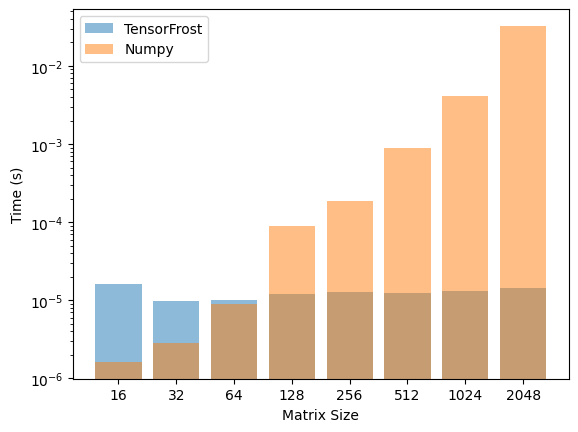

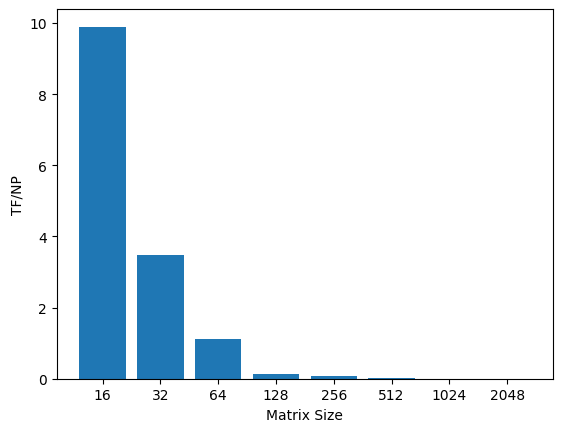

[1.61231164438163e-05, 9.784938308219617e-06, 9.990905974335977e-06, 1.1924956267135856e-05, 1.280171586371625e-05, 1.240352680009431e-05, 1.2986911809173874e-05, 1.4300828125268674e-05]
[1.6292341242336652e-06, 2.817204845569772e-06, 8.893114716707256e-06, 8.955181962896745e-05, 0.00018776393518215272, 0.000888284527387331, 0.004068363972795688, 0.03246358133131458]


In [5]:
# Bar plot
size_str = [str(s) for s in sizes]
plt.bar(size_str, tf_times, label="TensorFrost", alpha=0.5)
plt.bar(size_str, np_times, label="Numpy", alpha=0.5)
plt.legend()
plt.xlabel("Matrix Size")
plt.ylabel("Time (s)")
plt.yscale("log")
plt.show()

# Bar plot with ratio
size_str = [str(s) for s in sizes]
plt.bar(size_str, [tf_times[i] / np_times[i] for i in range(len(sizes))])
plt.xlabel("Matrix Size")
plt.ylabel("TF/NP")
plt.show()


print(tf_times)
print(np_times)